In [3]:
#Importing important librarys
import pandas as pd
import time
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import warnings
warnings.filterwarnings('ignore')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df1 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/linux_disk_1.csv')

In [6]:
df2 = pd.read_csv('/content/drive/MyDrive/datasets/Linux_processed/linux_disk_2.csv')

In [7]:
df = pd.concat([df1, df2])
df.tail(100003)

,ts,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label,type
827358,1556227788,2821,0.0,0.0,0,0.0,compiz,1,injection
827359,1556227793,3103,0.0,0.0,0,0.0,ostinato,1,injection
827360,1556227798,6451,0.0,0.0,0,0.0,atop,1,injection
827361,1556227803,6497,0.0,0.0,0,0.0,firefox,1,injection
827362,1556227808,2608,0.0,0.0,0,0.0,hud-service,1,injection
...,...,...,...,...,...,...,...,...,...
927356,1556768256,13555,0.0,0.0,0,0.0,<apache2>,0,normal
927357,1556768261,13556,0.0,0.0,0,0.0,<apache2>,0,normal
927358,1556768266,13557,0.0,0.0,0,0.0,<apache2>,0,normal
927359,1556768271,13486,0.0,0.0,0,0.0,<apache2>,0,normal


In [8]:
df.isnull()

,ts,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label,type
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
927356,False,False,False,False,False,False,False,False,False
927357,False,False,False,False,False,False,False,False,False
927358,False,False,False,False,False,False,False,False,False
927359,False,False,False,False,False,False,False,False,False


# **Pre-Processing**

In [9]:
#dropping unnecessary columns
df = df.drop(['ts', 'type' ], axis = 1)
df.shape


(1927361, 7)

In [10]:
import pandas as pd 
pd.set_option('max_rows', 299999)
pd.set_option('max_colwidth', 20000)
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

# **Processing the dataset**

In [11]:
df['CMD'] = le.fit_transform(df['CMD'])

df['RDDSK'] = (df['RDDSK'].replace(r'[KMB]+$', '', regex=True).astype(float) * df['RDDSK'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B', ' '], [10**3, 10**6, 10**9, '']).astype(int))

df['WRDSK'] = (df['WRDSK'].replace([r'[KMB]+$', ' ', '-'], ['', '' ,'0'], regex=True).astype(float) * df['WRDSK'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

df['WCANCL'].replace( ['2%','5%','1%','6%', '3%','4%' ] ,[ '0.002','0.005', '0.001','0.006', '0.003','0.004' ], inplace= True)
df['WCANCL'] = (df['WCANCL'].replace(r'[KMB]+$' , '', regex=True).astype(float) * df['WCANCL'].str.extract(r'[\d\.]+([KMB]+)', expand=False).fillna(1).replace(['K','M', 'B'], [10**3, 10**6, 10**9]).astype(int))

df['DSK'].replace( ['worer/u256:0', 'atop', 'dhclient', 'apache2','<apache2>', '<dhclient>' ] ,[ '0','0', '0','0', '0','0' ], inplace= True)
df['DSK'].replace('%', '', regex=True, inplace=True)
df['DSK'] = df['DSK'].astype(float)

In [12]:
df['DSK'].replace([8.0, 5.0, 4.0, 2.0, 26.0, 12.0, 6.0, 29.0, 19.0, 52.0, 11.0, 3.0, 87.0, 66.0, 79.0, 9.0, 13.0, 82.0, 91.0, 93.0, 62.0, 7.0, 88.0, 48.0, 81.0, 84.0, 94.0, 90.0, 92.0, 86.0, 95.0, 96.0, 75.0, 16.0, 54.0, 18.0, 17.0, 25.0, 47.0, 20.0, 60.0, 74.0, 10.0, 24.0, 37.0, 33.0, 23.0, 44.0, 15.0, 43.0, 28.0, 61.0, 59.0, 89.0, 40.0, 21.0, 22.0, 69.0, 97.0, 70.0, 63.0, 83.0, 58.0, 41.0, 45.0, 27.0, 14.0, 78.0, 77.0, 71.0, 39.0, 56.0, 32.0, 98.0, 76.0, 42.0, 57.0, 80.0, 51.0, 73.0, 30.0, 31.0, 50.0, 68.0, 38.0, 46.0, 53.0, 49.0, 72.0, 35.0, 34.0, 36.0, 55.0, 99.0, 67.0, 65.0, 100.0, 85.0, 64.0], [0.08, 0.05, 0.04, 0.02,0.26, 0.12, 0.06, 0.29, 0.19, 0.52, 0.11, 0.03, 0.87, 0.66, 0.79, 0.09, 0.13, 0.82, 0.91, 0.93, 0.62, 0.07, 0.88, 0.48, 0.81, 0.84, 0.94, 0.90, 0.92, 0.86, 0.95, 0.96, 0.75, 0.16, 0.54, 0.18, 0.17, 0.25, 0.47, 0.20, 0.60, 0.74, 0.10, 0.24, 0.37, 0.33, 0.23, 0.44, 0.15, 0.43, 0.28, 0.61, 0.59, 0.89, 0.40, 0.21, 0.22, 0.69, 0.97, 0.70, 0.63, 0.83, 0.58, 0.41, 0.45, 0.27, 0.14, 0.78, 0.77, 0.71, 0.39, 0.56, 0.32, 0.98, 0.76, 0.42, 0.57, 0.80, 0.51, 0.73, 0.30, 0.31, 0.50, 0.68, 0.38, 0.46, 0.53, 0.49, 0.72, 0.35, 0.34, 0.36, 0.55, 0.99, 0.67, 0.65, 1.00, 0.85, 0.64], regex=True, inplace=True)


In [13]:
df.dtypes

PID         int64
RDDSK     float64
WRDSK     float64
WCANCL    float64
DSK       float64
CMD         int64
label       int64
dtype: object

# **Done Pre-Processing**

In [14]:
cor= df.corr()
cor


,PID,RDDSK,WRDSK,WCANCL,DSK,CMD,label
PID,1.000000,-0.001142,-0.000108,-0.000586,-0.036870,-0.260500,-0.047692
RDDSK,-0.001142,1.000000,0.109378,0.062897,0.013842,-0.000072,-0.000447
WRDSK,-0.000108,0.109378,1.000000,0.021737,0.018047,-0.001254,0.003877
WCANCL,-0.000586,0.062897,0.021737,1.000000,0.001406,0.001143,-0.000063
DSK,-0.036870,0.013842,0.018047,0.001406,1.000000,0.057215,-0.003640
CMD,-0.260500,-0.000072,-0.001254,0.001143,0.057215,1.000000,-0.001754
label,-0.047692,-0.000447,0.003877,-0.000063,-0.003640,-0.001754,1.000000


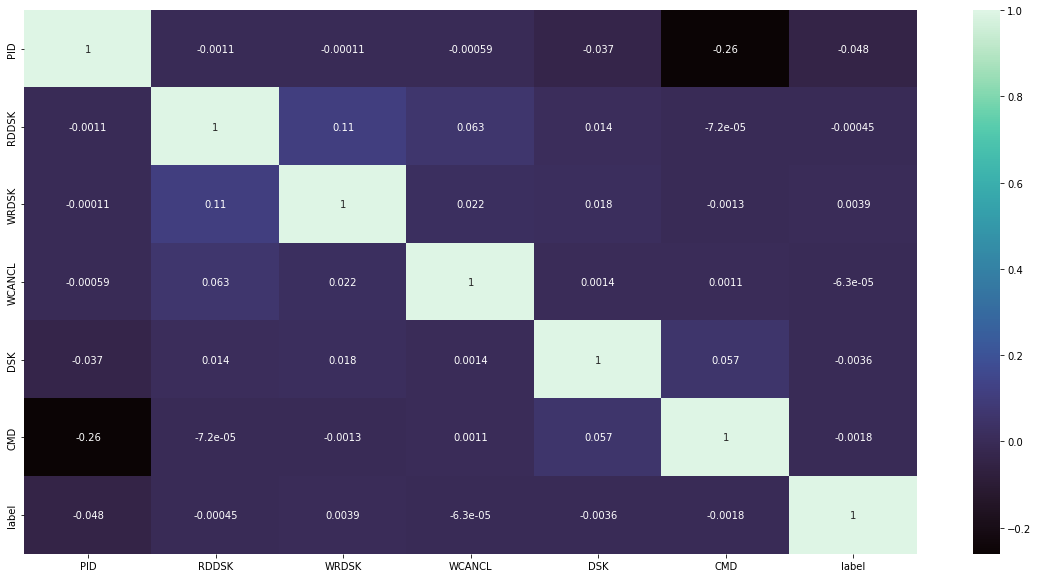

In [15]:
plt.figure(figsize=(20, 10))
sns.heatmap(data=cor, annot = True, cmap='mako')

In [16]:
# import matplotlib.pyplot as plt
# columns = df.columns
# for col in columns:
#     print("col: ", col)
#     df[col].hist()
#     plt.show()

# **Train Test Split**

In [17]:
#from sklearn.model_selection import train_test_split
#X=df[['PID','TRUN','TSLPI','TSLPU','POLI','NICE','PRI','CPUNR','Status','EXC','State','CPU','CMD']]
#y=df[['label' ]]
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
#X.shape , y.shape

In [1]:
x=df[['PID','RDDSK',	'WRDSK'	,'WCANCL',	'DSK'	,'CMD']]
y=df['label' ]

NameError: ignored

# **Logistic Regression**

In [19]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=8, shuffle = True, random_state=3)

In [20]:
for train_index, test_index in skf.split(x, y):
    x_train, x_test, y_train, y_test = x.iloc[train_index], x.iloc[test_index], y.iloc[train_index], y.iloc[test_index]
    
lr = LogisticRegression(class_weight="balanced")
lr.fit(x_train, y_train) #Training the model
y_pred_logistic = lr.predict(x_test)
print(y_pred_logistic)# printing predictions


#Accuracy Score

from sklearn.metrics import accuracy_score
LogisticRegressionAccuracy = accuracy_score(y_test, y_pred_logistic)
print("Accuracy of Logistic Regression : ",LogisticRegressionAccuracy*100,'%')

#F1 Score

from sklearn.metrics import f1_score
LogisticRegressionf1_scr = f1_score(y_test, y_pred_logistic)
print("f1_score of Logistic Regression : ",LogisticRegressionf1_scr*100,'%')

#AUC Score

from sklearn.metrics import roc_auc_score
auc = roc_auc_score (y_test, y_pred_logistic)
print('AUC: %.2f' % auc)

[1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0
 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1
 1 0 0 0 0 1 1 0 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0
 1 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0
 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 0
 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0
 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 0 1 1
 1 0 1 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 1 1 1 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1
 1 1 0 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0
 1 1 1 1 0 1 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1
 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 0 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0 1
 0 1 0 1 0 1 1 0 0 1 0 1 

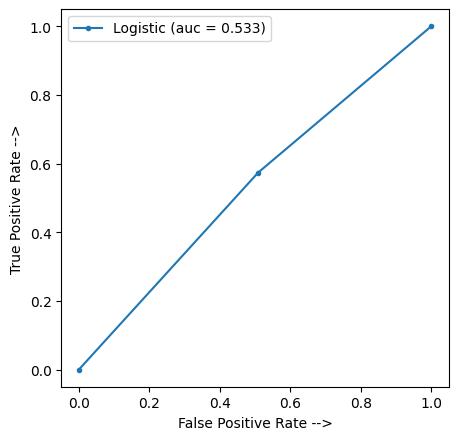

In [21]:
#ROC CURVE:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, y_pred_logistic)
auc_logistic = auc(logistic_fpr, logistic_tpr)

plt.figure(figsize=(5, 5), dpi=100)
plt.plot(logistic_fpr, logistic_tpr, marker='.', label='Logistic (auc = %0.3f)' % auc_logistic)

plt.xlabel('False Positive Rate -->')
plt.ylabel('True Positive Rate -->')

plt.legend()

plt.show()

In [22]:
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix
confusion_matrix(y_test,y_pred_logistic)

array([[ 98847, 102493],
       [ 16855,  22725]])

In [23]:
# Import LR, DTC, EMB, RF, LIME, SHAP
!pip install shap
!pip install interpret
from interpret.glassbox import (LogisticRegression, ClassificationTree, ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 575.9/575.9 KB 10.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 47.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 280.2/280.2 KB 28.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 63.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 65.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.0/758.0 KB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 KB 26.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 KB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [24]:

#Interpretable =>
# %% logistic regression model
lr = LogisticRegression(random_state=2021, feature_names=x_train.columns, penalty='l1', solver='liblinear')
lr.fit(x_train, y_train)
print("Training finished.")
# %% Evaluate logistic regression model
y_pred = lr.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# %% Explain local prediction
lr_local = lr.explain_local(x_test[:100], y_test[:100], name='Logistic Regression')
show(lr_local)
# %% Explain global logistic regression model
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global)

Training finished.
F1 Score 0.45527886039084975
Accuracy 0.8357172505395982


In [25]:
# %% LR Lime
from interpret.blackbox import LimeTabular
from interpret import show

lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(predict_fn=lr.predict_proba, 
                   data=x_train, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(x_test[-20:], 
                                y_test[-20:], 
                                name='LIME')
show(lime_local)

F1 Score 0.45527886039084975
Accuracy 0.8357172505395982


In [26]:
# # %% decision tree model
# tree = ClassificationTree()
# tree.fit(x_train, y_train)
# print("Training finished.")
# y_pred = tree.predict(x_test)
# print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
# print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# # %% Explain local prediction
# tree_local = tree.explain_local(x_test[:100], y_test[:100], name='Tree')
# show(tree_local)



In [27]:

# # %% Explainable Boosting Machine
# ebm = ExplainableBoostingClassifier(random_state=2021)
# ebm.fit(x_train, y_train) 
# print("Training finished.")
# y_pred = ebm.predict(x_test)
# print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
# print(f"Accuracy {accuracy_score(y_test, y_pred)}")
# # %% Explain locally
# ebm_local = ebm.explain_local(x_test[:100], y_test[:100], name='EBM')
# show(ebm_local)
# # %% Explain globally
# ebm_global = ebm.explain_global(name='EBM')
# show(ebm_global)

#**Xboost and Shap**

In [28]:
import shap
import xgboost
model = xgboost.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, max_depth = 5, alpha = 10, n_estimators = 10).fit(x, y)

In [29]:
# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn, transformers, Spark, etc.)
shap.initjs()
explainer = shap.Explainer(model)
shap_values = explainer(x_test)

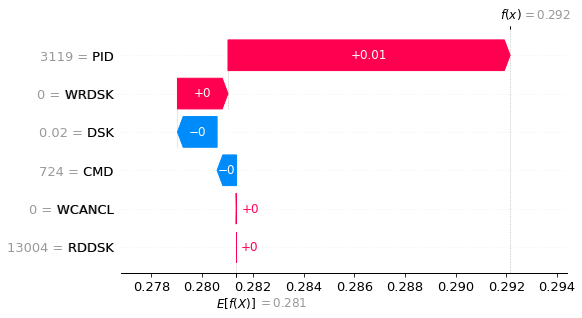

In [30]:
# visualize the first prediction's explanation
shap.initjs()
shap.plots.waterfall(shap_values[0])

In [31]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.plots.force(shap_values[0])

In [ ]:
# visualize all the training set predictions
shap.initjs()
shap.plots.force(shap_values)

In [ ]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.initjs()
shap.plots.scatter(shap_values[:,"RM"], color=shap_values)

In [ ]:
# summarize the effects of all the features
shap.initjs()
shap.plots.beeswarm(shap_values)

In [ ]:
shap.initjs()
shap.plots.bar(shap_values)